# **Unsupervised Learning**

**This notebook has been prepared by:**
* Zizipho Tyeko
* Siyamanga Malawu
* Lejone Malokosta
* Pfano Phungo
* Mogau Mogashoa
* Dunyiswa Matshaya

### How is the notebook going to work?

This notebook is a layout of a recommender system that is used to predict a movie user possible rating. The notebook will make use of the recommender system methods and techniques using sequential steps to get to the prediction of the possible expected results.


# **Movie Recommendation Challenge**

## **Recommender System**

Recommender systems are amid the most well known applications of data science today. They are used to predict the "rating" or "preference" that a user would possibly give to an item. Recommender systems uses its techniques by searching through large volume of dynamically generated information to provide users with personalized content and services.
Technically recommender system has the ability to predict whether a particular user would prefer an item or not based on the user’s profile.

# **Introduction**

The aim of this notebook is to predict how a user will rate a movie they have not yet viewed, based on their historical preference on a movie website or application e.g Netflix, Showmax or Amazon Prime.

Movie websites and applications can improve their reliability and enhance their customer experience by providing an estimated rating or preference of a movie through a recommender system used to model the predicted results.

Recommender systems are essential economically and socially in today's technology driven world. This can help movie companies in ensuring that their users can make the appropriate choices surrounding the content that they regulary engage with.

## **Aim**
Design a recommendersystem which will predict a user possible rating on a movie that they have not viewed yet based on they user history of their movie ratings.

## **Scope**
The scope of this project is to analyse and search through large volume of dynamically generated information consisting of movie ratings given by a user and information describing the movie.
These ratings will be used to train machine learning models to help with the prediction of the ratings given by a user on an unseen movie. This could also help with providing users with personalised content and services.

<img src="https://posteet.com/wp-content/uploads/2019/11/movies.png" width=90%>

# **Table of Content**

1. Import packages
2. Loading Datasets
3. Data Description
4. Explanotory Data Analysis
5. Data Filtering
6. Varibale Selection
7. Modeling
8. Model Comparison
9. Model Explanation
10. Submission
11. Application Pickled files


## 1. Importing packages

In [2]:
# utilities
import numpy as np
import pandas as pd

#pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import cufflinks as cf
plt.style.use('ggplot')
%matplotlib inline
sns.set()

from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, SVDpp
from surprise.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from datetime import datetime
import datetime
from timeit import default_timer

#others
import re

# 2. Loading Datasets

This section loads and checks the data needed to run this notebook.
To ensure the notebook runs without any error, the relevent csv files need to be present in the notebook's directory before running the next cell.

In [3]:
train = pd.read_csv('../input/edsa-recommender-system-predict/train.csv') 
test = pd.read_csv('../input/edsa-recommender-system-predict/test.csv')
scores = pd.read_csv('../input/edsa-recommender-system-predict/genome_scores.csv')
tags = pd.read_csv('../input/edsa-recommender-system-predict/genome_tags.csv')
imdb = pd.read_csv('../input/edsa-recommender-system-predict/imdb_data.csv') 
links = pd.read_csv('../input/edsa-recommender-system-predict/links.csv') 
movies = pd.read_csv('../input/edsa-recommender-system-predict/movies.csv')
sample = pd.read_csv('../input/edsa-recommender-system-predict/sample_submission.csv')

In [50]:
print("Train\n")
print(train.head(5))
print("Test\n")
print(test.head(5))
print("Scores\n")
print(scores.head(5))
print("Tags\n")
print(tags.head(5))
print("imdb\n")
print(imdb.head(5))
print("Links\n")
print(links.head(5))
print("\nMovies")
print(movies.head(5))

print("\n(Datasets were imported correctly)")

Train

   userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837
Test

   userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318
Scores

   movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075
Tags

   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s
imdb

   movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Lore

# 3. Data Description

Now that we have loaded the datasets into the notebook here we display the information of the datasets that we will be using, check if there are gaps or blanks in the datasets and check how the sentyiments of the rating look like.

### 3.1 Checking the data types of the train data sets and the unique values of the rating column in the train dataset

In [51]:
print(train.info())
print('The rating sentiments are as follows: /n')
print(train['rating'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
None
The rating sentiments are as follows: /n
[4.  4.5 5.  2.  3.  1.  3.5 2.5 0.5 1.5]


The train dataset consist of the user rating information, which is the user ID, the movie the user rated using the movie ID, the timestamp that the rating was made by the user and the rating itself. 
The rating sentiment ranges from 0.5 to 5. With 0.5 being the lowest rating and 5 being the highest rating of a movie. 

### 3.2 Checking and removing null values from the datasets that we are planning to use

In [52]:
print("No of Nan values in our dataframe : ", sum(train.isnull().any()))

No of Nan values in our dataframe :  0


In [53]:
print("No of Nan values in our dataframe : ", sum(test.isnull().any()))

No of Nan values in our dataframe :  0


In [54]:
print("No of Nan values in our dataframe : ", sum(movies.isnull().any()))

No of Nan values in our dataframe :  0


The above datasets are the ones that we will be using the most in this notebook. So we are checking if there is any null values that we would need to remove from the datasets. However reading from the results above there are no null values from the datasets at all. So because of that we won't need to remove any null values.

### 3.3 Checking and removing duplicate values

In [55]:
# Remove duplicate entries for userId, movieId and rating in the train dataset 
dup_bool = train.duplicated(['userId','movieId','rating'])
dups = sum(dup_bool) 
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


In [56]:
# Remove duplicate entries for userId, movieId in the test dataset 
dup_bool = test.duplicated(['userId','movieId'])
dups = sum(dup_bool) 
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


In [57]:
# Remove duplicate entries for movieId, title, genres in the movies dataset 
dup_bool = movies.duplicated(['movieId', 'title', 'genres'])
dups = sum(dup_bool) 
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


We also checking for any duplicated data in the above datasets. As we we can see we have 0 duplicated data, so no removal of any duplicates from the datasets

# **4. Exploratory Data Analysis**

### 4.1 Calculating the number of user's, movies and ratings from the train dataset

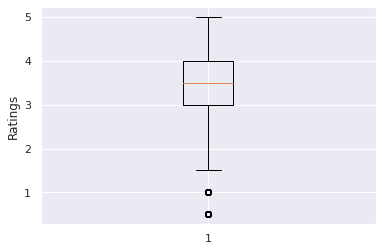

In [58]:
'''box plot for ratings'''
box = train['rating']
plt.boxplot(box)
plt.ylabel('Ratings')
plt.show()

The above box plot is illustrating the 5 number summary of the ratings in the train dataset. 75% of the ratings are above 3 this means that people like the movies on this dataset.

In [59]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",train.shape[0])
print("Total No of Users   :", len(np.unique(train.userId)))
print("Total No of movies  :", len(np.unique(train.movieId)))

Total data 
--------------------------------------------------

Total no of ratings : 10000038
Total No of Users   : 162541
Total No of movies  : 48213


The above code is showing us the total length of the features in the train dataset.
This is the total number of the ratings, the total number of users and the total number of movies rated.

Below we will use a method called "human". This method will just help us with making one of our graphs more readable

In [60]:
'''This is a method that improves the readability of a graph.'''
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

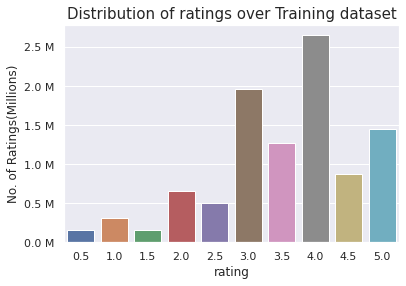

In [61]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(train.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

In the above graph we can see that we have over 2.5 million 4.0 scale number of ratings follwed by the 3.0 scale that has a little below 2 million number of ratings and in 3rd place it is the 5.0 scale that has a little below 1.5 million ratings. 

### 4.2 Analysis of ratings of a movie given by a user

To analyse the ratings given by a user for a specific movie, we will use the movieId and rating features from the Train dataset

In [62]:
train_df = train.copy()

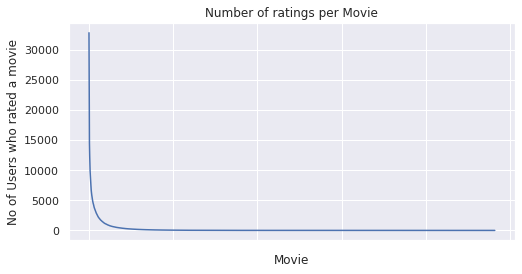

In [63]:
no_of_ratings_per_movie = train_df.groupby(by='movieId')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('Number of ratings per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

The plot is very skewed.. just like number of ratings given per user.

There are some movies which are very popular which are rated by a huge number of users, though they are very few (less than 15 %).

But most of the movies(about 85%) have ratings below 1000.

### 4.3 Converting timestamp column into date time

Below we are converting the timestamp feature in the T
rain dataset from an integer datatype to a datetime datatype so that we can see the actual date of the rating, the actual month, the day of the week and the year that the rating was given by the user.

In [64]:
'''converting timestamp column to datetime'''
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'], unit='ms')
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1970-01-18 13:45:49.992
1,106343,5,4.5,1970-01-14 23:03:58.739
2,146790,5459,5.0,1970-01-13 10:56:55.539
3,106362,32296,2.0,1970-01-17 11:17:22.565
4,9041,366,3.0,1970-01-10 15:29:35.837


#### 4.3.1 Adding a day of week column in the train data set to analyse ratings on each day of the week

In [65]:
'''extracting days of the week'''
train_df['day_of_week'] = train_df['timestamp'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
train_df['day_of_week'] = train_df['day_of_week'].apply(lambda x: days[x])
train_df.tail()

,userId,movieId,rating,timestamp,day_of_week
10000033,136395,99114,5.0,1970-01-18 14:33:55.092,Sun
10000034,140078,553,3.0,1970-01-12 14:29:40.977,Mon
10000035,154807,56782,4.0,1970-01-15 05:01:14.807,Thurs
10000036,85805,327,4.0,1970-01-18 03:05:21.530,Sun
10000037,139457,1009,4.0,1970-01-10 22:36:24.862,Sat


Text(0, 0.5, 'Days of the week')

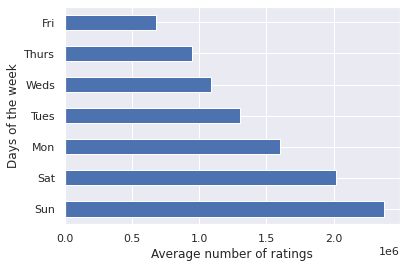

In [66]:
'''plotting average number of ratings for each day'''
train_df['day_of_week'].value_counts().plot(kind='barh')
plt.xlabel('Average number of ratings')
plt.ylabel('Days of the week')

We calcated the average rating for each day of the week and we can see that we receive the most ratings on a Sunday and on a Saturday. As that would be the time that user's are more settled at home, because it would be end of week and thats the time that most user's would have time to watch movies.

### 4.4 Analysis of ratings given by a user

In the following we will analyse the ratings that are made by the users. We use the userId and the rating feature from the Train dataset to do this analysis.

In [67]:
no_of_rated_movies_per_user = train_df.groupby(by='userId')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

userId
72315     12952
80974      3680
137293     3588
33844      3208
20055      3050
Name: rating, dtype: int64

Above we can see the total number of ratings of the top 5 users.

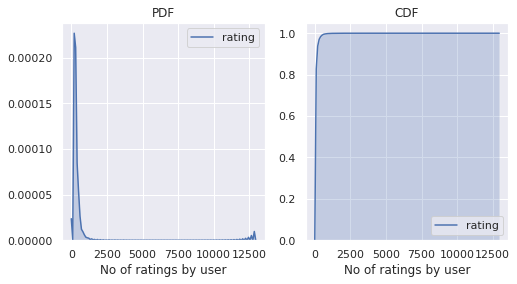

In [68]:
'''plotting the PDF and CDF graphs'''
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

Most users seem to have low ratings. This is evident from the PDF plot above as number of ratings by user is very low after 2000 ratings. There also seems to be some more users with ratings around 10 000 and less. We now have to investigate the distribution of the ratings further.

In [69]:
no_of_rated_movies_per_user.describe()

count    162541.000000
mean         61.523173
std         107.410889
min           1.000000
25%          14.000000
50%          28.000000
75%          65.000000
max       12952.000000
Name: rating, dtype: float64

In [70]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

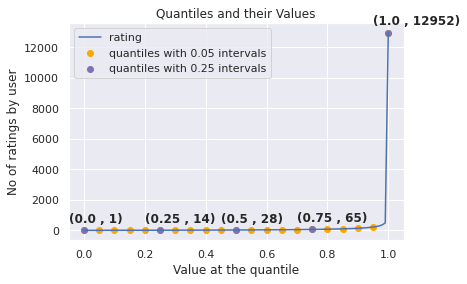

In [71]:
plt.title("Quantiles and their Values")
quantiles.plot()
'''quantiles with 0.05 difference'''
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

Below we see that most user ratings are higher on the 75th percentile

In [72]:
quantiles[::5]

0.00        1
0.05        8
0.10       10
0.15       11
0.20       13
0.25       14
0.30       16
0.35       19
0.40       21
0.45       25
0.50       28
0.55       33
0.60       39
0.65       45
0.70       54
0.75       65
0.80       81
0.85      104
0.90      142
0.95      222
1.00    12952
Name: rating, dtype: int64

How many ratings do we have at the last 5% of all ratings??

In [73]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user>= 222)) )


 No of ratings at last 5 percentile : 8182



As per our observation earlier, number of ratings at last 5 percentile is 8182 out of 162541 ratings. The mean ratings is 49.218536 with standard deviation of 86.009691.

### 4.5 Calculating the number of movies per genre

Which genre appears the most with the rated movies?

Below we will look at the genres feature from the Movies dataset and see which genre seems to appear the most with the rated movies. 

We made use of the count_genre function that will help us count the number of times each genre is mentioned

In [74]:
movies_df = movies.copy()

In [75]:
'''Split the genres into individual genres'''
genre_labels = set()
for s in movies_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
    
'''Function that counts the number of times each of the genre appear'''
def count_genre(dataset, ref_col, census):
    genre_count = dict()
    for s in census: 
        genre_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                genre_count[s] += 1
    '''______________________________________________________________________
     convert the dictionary in a list to sort the keywords by frequency '''
    genre_freq = []
    for k,v in genre_count.items():
        genre_freq.append([k,v])
    genre_freq.sort(key = lambda x:x[1], reverse = True)
    return genre_freq, genre_count

'''Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency'''
genre_freq, dum = count_genre(movies_df, 'genres', genre_labels)
genre_freq[:5]

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348]]

In [76]:
'''Convert the frequency to dictionary'''
genres = dict()
trunc_freq = genre_freq[0:18]
for s in trunc_freq:
    genres[s[0]] = s[1]
    
    '''Convert to Dataframe'''
df=pd.DataFrame.from_dict(genres, orient='index').transpose()
df

,Drama,Comedy,Thriller,Romance,Action,Horror,Documentary,Crime,(no genres listed),Adventure,Sci-Fi,Children,Animation,Mystery,Fantasy,War,Western,Musical
0,25606,16870,8654,7719,7348,5989,5605,5319,5062,4145,3595,2935,2929,2925,2731,1874,1399,1054


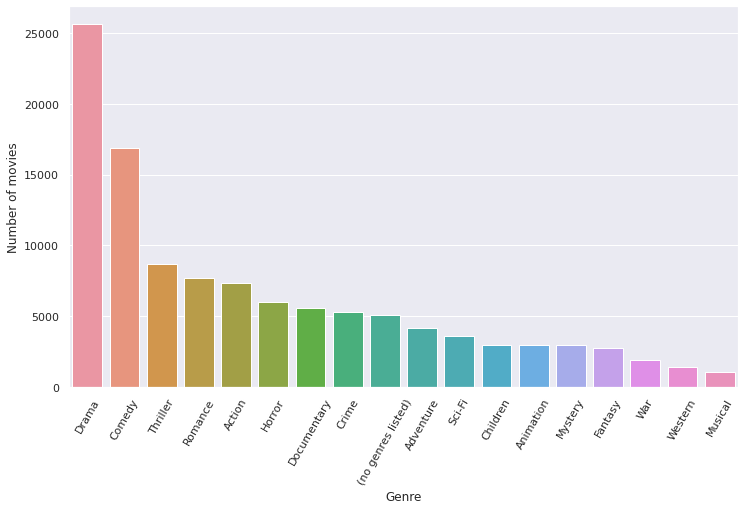

In [77]:
genres_list = list(genres.keys())

'''Plot a bar plot of genres sorted in ascending order'''
plt.figure(figsize=(12,7))
genre_counts = df.loc[:,genres_list].sum().sort_values(ascending=False)
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('Number of movies');

In the above histogram we can see that the Drama genre seems to be having the most movies tags with a little over 25000 released movies followed by the Comedy genre that has over over 15000 movies. This could possibly mean that most ratings are coming from these two genres as well.

#### 4.5.1 Using WordCloud to check which words appear most frequent under genres

We want use the WordCloud technique to read into our genres to see which words is commonly found in each genre of a movie. 
This will help us confirm the above graph as well, because if a movie genre appears the most then that will mean that it is tagged the most in the rated movies.
We will make use of the Movies and the Tags datasets as it will help us analyse the the data we need using the genres feature from the Movies dataset and the tag feature from the Tag dataset.

In [78]:
movies['genres'] = movies['genres'].astype('str')
tags['tag'] = tags['tag'].astype('str')
overview_corpus = ' '.join(movies['genres'])
tag = ' '.join(tags['tag'])

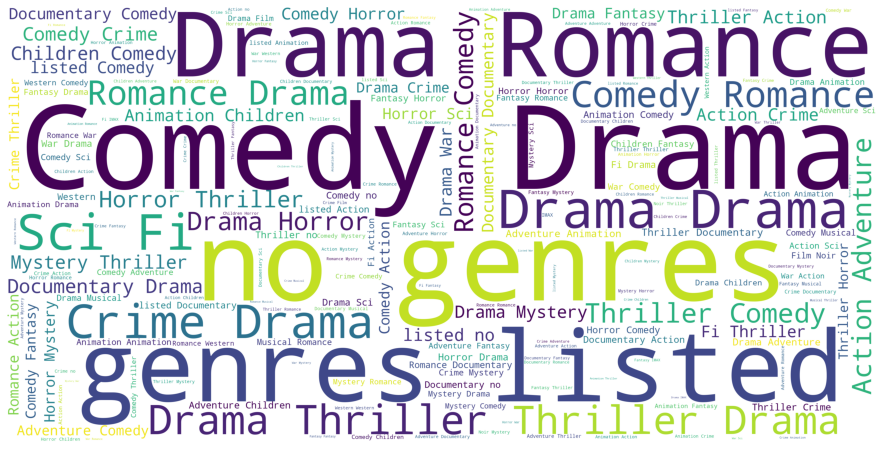

In [79]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

The wordcloud confirms the genre graph above where Drama and Comedy seems to appear to have the most movies. The wordcloud shows that the Drama and Comedy words appear the most or are most common on the movie genres and seems to be tagged more than other genres as well. These two genres are also followed by the Romance and Thriller genres that also seem to be common words on the WordCloud.

### 4.6 Calculating the number of movies released each year and number of ratings each year

Before we can run any graphs we first need to do the following:

* Split title and year into separate columns. Convert year to datetime.
* Categorize genres properly: split strings into boolean columns per genre.
* Modify the rating timestamp: from universal seconds to datetime year.
* Check for NaN values. Clean (delete rows) if % of NaN values is small.

We are going to use the Train and the Movies datasets. As we want to view the number of movies released on a yearly basis and also take a look at the ratings on a yearly basis as well

In [4]:
'''Using the timestamp feature to generate the year and the month of the ratings'''
from datetime import datetime
train_df1 = train.copy() 
movies_df1 = movies.copy()


train_df1['year'] = train_df1['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).year)
train_df1['month'] = train_df1['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).month)
train_df1.head()

,userId,movieId,rating,timestamp,year,month
0,5163,57669,4.0,1518349992,2018,2
1,106343,5,4.5,1206238739,2008,3
2,146790,5459,5.0,1076215539,2004,2
3,106362,32296,2.0,1423042565,2015,2
4,9041,366,3.0,833375837,1996,5


In [5]:
st = default_timer()

'''We are using the movieId, title, genre and rating features from the Movies and Train datasets'''
    
'''Organise a bit and store into feather-format'''
movies_df1.sort_values(by='movieId', inplace=True)
movies_df1.reset_index(inplace=True, drop=True)
train_df1.sort_values(by='movieId', inplace=True)
train_df1.reset_index(inplace=True, drop=True)

print(train_df1.dtypes)

'''Split title and release year in separate columns in movies dataframe. Convert year to timestamp.'''
movies_df1['year'] = movies_df1.title.str.extract("\((\d{4})\)", expand=True)
movies_df1.year = pd.to_datetime(movies_df1.year, format='%Y')
movies_df1.year = movies_df1.year.dt.year 
movies_df1.title = movies_df1.title.str[:-7]

'''Categorize movies genres properly. '''
genres_unique = pd.DataFrame(movies_df1.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) # Format into DataFrame to store later
movies_df1 = movies_df1.join(movies_df1.genres.str.get_dummies().astype(bool))
movies_df1.drop('genres', inplace=True, axis=1)

# Modify rating timestamp format (from seconds to datetime year)
#ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s')
#train_df1.timestamp = pd.to_datetime(train_df1.timestamp, infer_datetime_format=True)
#train_df1.timestamp = train_df1.timestamp.dt.year


print ("Number of movies Null values: ", max(movies_df1.isnull().sum()))
print ("Number of ratings Null values: ", max(train_df1.isnull().sum()))
movies_df1.dropna(inplace=True)
train_df1.dropna(inplace=True)
    
'''Organise a bit, then save into feather-formatand clear from memory'''
movies_df1.sort_values(by='movieId', inplace=True)
train_df1.sort_values(by='movieId', inplace=True)
movies_df1.reset_index(inplace=True, drop=True)
train_df1.reset_index(inplace=True, drop=True)
    
runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

userId         int64
movieId        int64
rating       float64
timestamp      int64
year           int64
month          int64
dtype: object
Number of movies Null values:  410
Number of ratings Null values:  0
Elapsed time(sec):  8.21


Let's plot the graph for the above data that has been processed. 

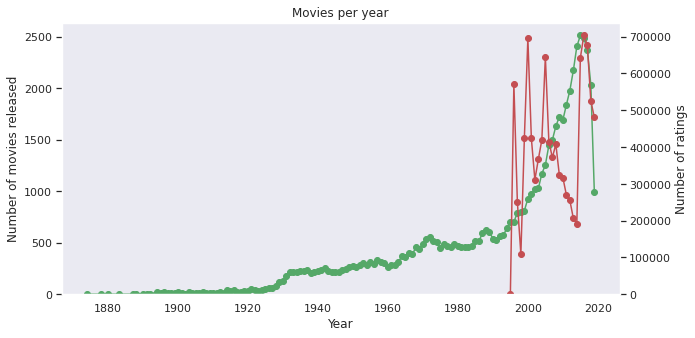

Elapsed time(sec):  1.02


In [6]:
st = default_timer()

'''Plotting the graph of the above processed data'''
dftmp = movies_df1[['movieId', 'year']].groupby('year')

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(dftmp.year.first(), dftmp.movieId.nunique(), "g-o")
ax1.grid(None)
ax1.set_ylim(0,)

dftmp = train_df1[['rating', 'year']].groupby('year')
ax2 = ax1.twinx()
ax2.plot(dftmp.year.first(), dftmp.rating.count(), "r-o")
ax2.grid(None)
ax2.set_ylim(0,)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released'); ax2.set_ylabel('Number of ratings')
plt.title('Movies per year')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^ax1$|^ax2$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

Number of movies released per year increases almost exponentially until 2017, then flattening and dropping signifincantly thereafter each year. This could possibly mean that expontential growth (i.e. bubbles) is seldom sustainable in the long term.
The ratings given by users only started in the year 1995 up until 2019. The ratings has been changing a lot some years the ratings increased some decreased but there has been a tremendous decrease in 2009 but then a tremendous increase in 2015 and then there after the ratings keep slightly decreasing each year.

In the graph below we are going to look at the number of overall ratings on a monthly basis

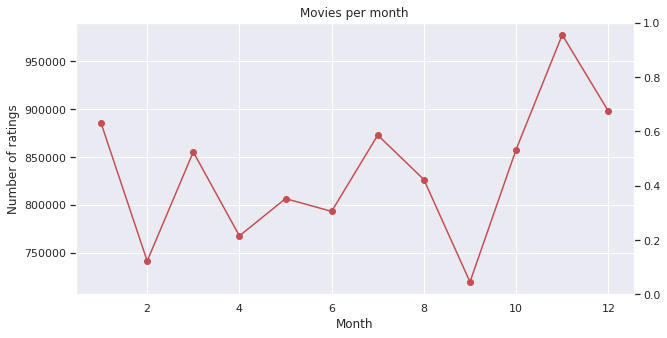

In [7]:
fig, ax1 = plt.subplots(figsize=(10,5))
dftmp1 = train_df1[['rating', 'month']].groupby('month')
ax2 = ax1.twinx()
ax1.plot(dftmp1.month.first(), dftmp1.rating.count(), "r-o")
ax2.grid(None)
ax2.set_ylim(0,)

ax1.set_xlabel('Month')
#ax1.set_ylabel('Number of movies released'); ax2.set_ylabel('Number of ratings')
ax1.set_ylabel('Number of ratings')
plt.title('Movies per month')
plt.show()

The above graph is showing that most ratings are received from the month of September up until November in a year, and then start decreasing in the month of December. The decrease is not significant, but that is maybe because users are busy with holiday commitments during that time.

### 4.7 Insights on the imbd features

#### 4.7.1 Lets have a look at the budget feature of the imbd dataset

The imdb dataset seem to give us more insight with regards to the movies. We will be using both the train and the imdb dataset to see what the yearly budget was for the movies.

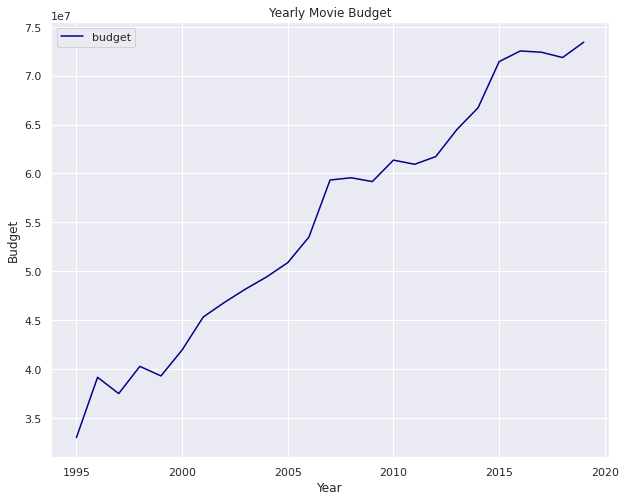

In [10]:
imdb_df = imdb.copy()
imdb_df.head()

'''removed special characters from the budget column and change its data type to float data type'''

imdb_df['budget'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]',value=r'') 
imdb_df['budget'] = imdb_df['budget'].astype(float)

'''merging the imdb and train table to see the overall yearly budget for all the movies'''
budget_data = pd.merge(imdb_df, train_df1, on='movieId')

year_mean = budget_data.groupby('year').mean()

year_mean[['budget']].plot(title = 'Yearly Movie Budget',color=('DarkBlue'),linestyle=('-'),figsize=(10, 8))
plt.xlabel('Year')
plt.ylabel('Budget');

In the above graph we can see that the budget of the movies increases every year. This could be due to change of time, technology and other contributing factors that cost more on a yearly basis as time goes. So that would lead to cost of production costing more each year

#### **4.7.2.Runtime of movies**

We want to see which movie has had the longest runtime amongst all the movies on the datasets. We are using the imdb dataset using the runtime feature.

In [11]:
runtime = pd.merge(imdb, movies, on='movieId')
runtime.head(2)

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy


In [12]:
'''top 5 movies with longest running time'''

runtime['runtime'] = runtime['runtime'].astype(float)
b = runtime.drop(['movieId','title_cast', 'director', 'budget', 'plot_keywords', 'genres'], axis=1)
b.head()
b.nlargest(5,['runtime'])

,runtime,title
23527,877.0,Taken (2002)
17784,750.0,Law of the Lawless (Brigada) (2002)
18402,644.0,Sam Peckinpah: Man of Iron (1993)
19449,629.0,Death on the Staircase (Soupçons) (2004)
19590,600.0,New York: A Documentary Film (1999)


The above dataframe show us the top 5 movies that had the longest runtime with 1st longest movie being Taken (2002)

#### 4.7.3 Directors with most ratings

With the use of the imdb and the train datasets we want to see which movie director has got the the highest overall ratings

In [13]:

b = pd.merge(train, imdb, on='movieId')
mean_count = pd.DataFrame(b.groupby('director')['rating'].mean())
mean_count['rating_counts'] = pd.DataFrame(b.groupby('director')['rating'].count())
mean_count.nlargest(5,['rating_counts'])

,rating,rating_counts
director,,
Quentin Tarantino,3.936571,109919
Michael Crichton,3.273370,65157
J.R.R. Tolkien,4.080118,62963
Lilly Wachowski,3.808348,60988
Stephen King,4.049956,59903


The director with most ratings is Quentin Tarantino with an average rating of 3.9

#### **4.7.4 Movie budgets**

For curiosity's sake we also want to have a look at the movies with the highest budget. We will use the Movies and imdb dataset, merging the dataset will give us a better view of the data that we are looking for.

In [14]:
#Top 5 movies with highest budget
budget = pd.merge(movies, imdb, on='movieId')
budget['budget'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]',value=r'') 
budget['budget'] = budget['budget'].astype(float)
z = budget.drop(['movieId','title_cast', 'director', 'runtime', 'plot_keywords', 'genres'], axis=1)
z.head()
z.nlargest(5,['budget'])

,title,budget
19083,My Way (Mai Wei) (2011),3.000000e+10
11434,"Host, The (Gwoemul) (2006)",1.221550e+10
19057,Nameless Gangster (Bumchoiwaui junjaeng) (2012),1.000000e+10
24570,Chiedimi se sono felice (2000),7.000000e+09
21893,"Tale of Princess Kaguya, The (Kaguyahime no mo...",5.000000e+09


The movie with the highest budget is My Way (Mai Wei) at 30 billion dollars

Merging the train and the imdb table to analyse any patterns between these two datasets regarding the movie rating and movie budget

In [24]:
budget_rating = pd.merge(train_df1, imdb_df, on='movieId')
budget_rating.head()

,userId,movieId,rating,timestamp,year,month,title_cast,director,runtime,budget,plot_keywords
0,120877,1,3.0,1135874095,2005,12,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000.0,toy|rivalry|cowboy|cgi animation
1,142161,1,4.0,875255657,1997,9,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000.0,toy|rivalry|cowboy|cgi animation
2,105990,1,5.0,992537063,2001,6,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000.0,toy|rivalry|cowboy|cgi animation
3,29401,1,3.5,1454640443,2016,2,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000.0,toy|rivalry|cowboy|cgi animation
4,22068,1,4.5,1516427283,2018,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000.0,toy|rivalry|cowboy|cgi animation


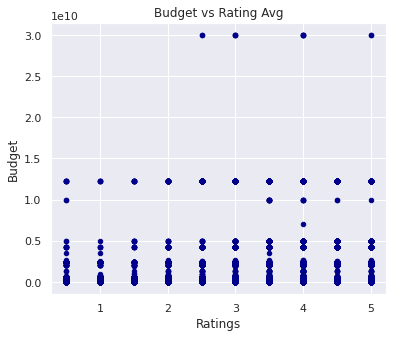

In [25]:
budget_rating.plot.scatter(x='rating', y='budget',title='Budget vs Rating Avg', color='DarkBlue', figsize=(6,5))
plt.xlabel('Ratings')
plt.ylabel('Budget');



The above graph is just showing us that the ratings on a movie does not really depend much on the budget of a movie. So a movie can have a high budget but still not get much ratings from user's.


# 5. Preprocessing

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

imdb_vec = imdb.copy()
# Using TF-IDF
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Filling NaNs with empty string
imdb_vec['plot_keywords'] = imdb_vec['plot_keywords'].fillna('')

# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(imdb_vec['plot_keywords'])

tfv_matrix.shape

(27278, 9461)

In [27]:
from sklearn.metrics.pairwise import sigmoid_kernel

movies_prep= movies.copy()

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

# Reverse mapping of indices and movie titles
indices = pd.Series(movies_prep.index, index=movies_prep['title']).drop_duplicates()

# Credit to Ibtesam Ahmed for the skeleton code
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_prep['title'].iloc[movie_indices]

In [28]:
# Testing our content-based recommendation system with the seminal film Spy Kid
give_rec('Spy Kids (2001)')

1                         Jumanji (1995)
2                Grumpier Old Men (1995)
3               Waiting to Exhale (1995)
4     Father of the Bride Part II (1995)
5                            Heat (1995)
6                         Sabrina (1995)
7                    Tom and Huck (1995)
8                    Sudden Death (1995)
9                       GoldenEye (1995)
10        American President, The (1995)
Name: title, dtype: object

# Modelling

### Two types of Recommender System

Collaborative Filtering Recommender System
Content-Based Recommender System

#### Collaborative Filtering Recommender System
Collaborative filtering recommender systems are based on the past interactions recorded between users and items in order to produce new recommendations. These interactions are stored in the so-called “user-item interactions matrix”.
#### Content-Based Recommender System
Content based recommender system use additional information about users and/or items to make predictions.This additional information can be, for example, the age, the sex, the job or any other personal information for users.


We implemented a collaborative recommendation system which is system that uses the historical rating of movies by a user to recommend the rating they would give for a new movie. 

In [ ]:
#taking a sample of 5% of the training data 
train = train.sample(frac =.05)

In [ ]:
reader = Reader(rating_scale=(0.5,5.0))
# It is to specify how to read the dataframe.
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = data.build_full_trainset()

# Fitting models

## Singular Value Decomposition

The Singular Value Decomposition (SVD), a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N). In the context of the recommender system, the SVD is used as a collaborative filtering technique.

In [ ]:
# Using the SVD algorithm.
svd = SVD()
svd.fit(trainset)

### NMF

NMF stands for non-negative matrix factorization, a technique for obtaining low rank representation of matrices with non-negative or positive elements

In [ ]:
from surprise import NMF
# Using the SVD algorithm.
nmf = NMF()
nmf.fit(trainset)

### SVD++

The SVD++ algorithm, an extension of SVD taking into account implicit ratings.

The prediction r^ui is set as:

r^ui=μ+bu+bi+qTi(pu+|Iu|−12∑j∈Iuyj)

Where the yj terms are a new set of item factors that capture implicit ratings. Here, an implicit rating describes the fact that a user u rated an item j, regardless of the rating value.

In [ ]:
# Use the SVD algorithm.
svdpp = SVDpp()
svdpp.fit(trainset)

- cross validation

In [ ]:
cross_validate(svd, data,measures=['RMSE'], cv = 5, verbose = True, n_jobs=-1)

In [ ]:
cross_validate(nmf, data,measures=['RMSE'], cv = 5, verbose = True, n_jobs=-1) 

In [ ]:
cross_validate(svdpp, data,measures=['RMSE'], cv = 5, verbose = True,n_jobs=-1) 

- Prediction

In [ ]:
def predicions(model, df, uid = 'userId', iid = 'movieId'):
    from tqdm import tqdm
    
    return[
        model.predict(uid=data[uid],iid =data[iid])[3]
        for _, data in tqdm(test[[uid,iid]].iterrows(),total=len(test))
    ]

In [ ]:
pred= predicions(svd, test, uid = 'userId', iid = 'movieId')

In [ ]:
pred0 = predicions(nmf, test, uid = 'userId', iid = 'movieId')

In [ ]:
pred1 = predicions(svdpp, test, uid = 'userId', iid = 'movieId')

- Submission

In [ ]:
test['Id'] = test['userId'].map(str)+ "_" +test['movieId'].map(str)
test.head()

In [ ]:
#Sellecting the index of the test dataframe
final_test= test["Id"]

In [ ]:
#Creating the submission Dataframe
Final_Table = {'Id': final_test, 'rating':np.round(pred, 1)}
submission = pd.DataFrame(data=Final_Table)
submission = submission[['Id', 'rating']]

In [ ]:
#Creating the submission Dataframe
Final_Table0 = {'Id': final_test, 'rating':np.round(pred0, 1)}
submission0 = pd.DataFrame(data=Final_Table)
submission0 = submission0[['Id', 'rating']]

In [ ]:
#Creating the submission Dataframe
Final_Table1 = {'Id': final_test, 'rating':np.round(pred1, 1)}
submission1 = pd.DataFrame(data=Final_Table)
submission1 = submission1[['Id', 'rating']]

- saving submission to csv files

In [ ]:
submission.to_csv("SvdSubmission.csv",index  = False) #writing csv file

In [ ]:
submission0.to_csv("nmfSubmission.csv",index  = False) #writing csv file

In [ ]:
submission1.to_csv("SvdppSubmission.csv",index  = False) #wrting csv file

# CONCLUSION

- HERE WE WILL CONCLUDE ON WHICH MODEL WORKED BEST

In [ ]:
# creating the dataset 
data = {'SVD':0.9363, 'NMF':1.0815, 'SVDpp':0.9289} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Model") 
plt.ylabel("RMSE score") 
plt.title("Mean RMSE score of the models") 
plt.show() 